In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [29]:
image=cv2.imread(r'C:\Users\student\Desktop\CV20\Lenna.png')
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

(-0.5, 511.5, 511.5, -0.5)

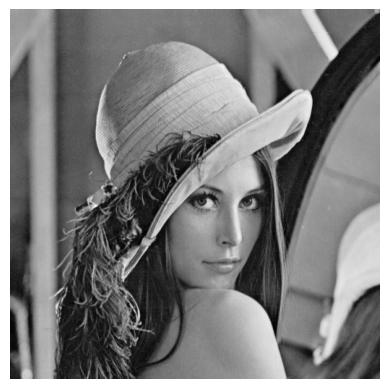

In [30]:
plt.imshow(image,cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

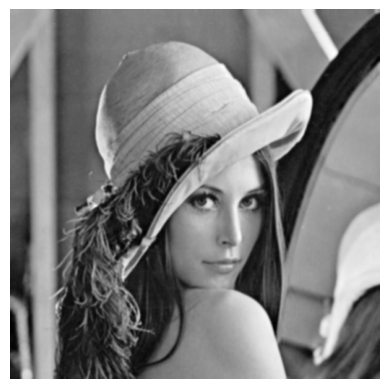

In [31]:
smoothened=cv2.GaussianBlur(image,(5,5),0)
plt.imshow(smoothened,cmap='gray')
plt.axis('off')

In [32]:
def edge_detect(image,a):
    if a=='r':
        matrix_x=np.array([[1,0],[0,-1]])
        matrix_y=np.array([[0,1],[-1,0]])
    elif a=='s':
        matrix_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
        matrix_y=matrix_x.T
    elif a=='p':
        matrix_x=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        matrix_y=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    h,w=image.shape
    
    g_x=np.zeros((h,w),dtype=np.float32)
    g_y=np.zeros((h,w),dtype=np.float32)
    
    for i in range(1,h-1):
        for j in range(1,w-1):
            if(a=='r'):
                region=image[i-1:i+1,j-1:j+1]
            else:
                region=image[i-1:i+2,j-1:j+2]
            gx=np.sum(region*matrix_x)
            gy=np.sum(region*matrix_y)
            g_x[i,j]=gx
            g_y[i,j]=gy
    sobel_mag=np.sqrt(g_x**2+g_y**2)
    sobel_mag=np.clip(sobel_mag,0,255)
    angle=np.arctan2(g_x,g_y)
    return sobel_mag,angle

In [33]:
edge,angle=edge_detect(smoothened,'s')
h,w=edge.shape
angle=angle*180/np.pi
angle=np.mod(angle,180)
output = np.zeros_like(edge, dtype=np.float32)
for i in range(1,edge.shape[0]-1):
    for j in range(1,edge.shape[1]-1):
        an=angle[i,j]
        if (an >= 0 and an < 22.5) or (an >= 157.5 and an < 180):
                neighbor1 =edge[i, j + 1]  
                neighbor2 = edge[i, j - 1]  
            
        elif (an >= 22.5 and an < 67.5):
                neighbor1 = edge[i + 1, j] 
                neighbor2 = edge[i - 1, j]  
            
        elif (an >= 67.5 and an < 112.5):
                neighbor1 = edge[i + 1, j + 1]  
                neighbor2 = edge[i - 1, j - 1]  
            
        else:
                neighbor1 = edge[i + 1, j - 1]  
                neighbor2 = edge[i - 1, j + 1] 
                
        if edge[i,j]>=neighbor1 and edge[i,j]>=neighbor2:
            output[i,j]=edge[i,j]
        else:
            output[i,j]=0


In [34]:
def double_thres(image,lT,hT):
    result=np.zeros_like(image,dtype=np.uint8)
    result[image>hT]=255
    result[(image>=lT) & (image<hT)]=128
    
    return result

In [35]:
final=double_thres(output,100,250)

Text(0.5, 1.0, 'Canny Edge detected')

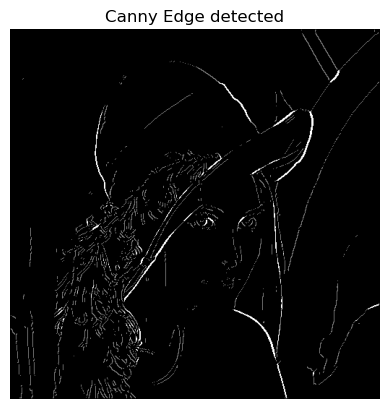

In [36]:
plt.imshow(final,cmap='gray')
plt.axis('off')
plt.title("Canny Edge detected")

In [37]:
def gaussian_kernel(size, sigma):
    
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma**2)) * np.exp(-((x - (size - 1) / 2)**2 + (y - (size - 1) / 2)**2) / (2 * sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)  

def apply_convolution(image, kernel):
    
    h, w = image.shape
    kernel_size = kernel.shape[0]
    pad = kernel_size // 2
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    result = np.zeros_like(image)

  
    for i in range(h):
        for j in range(w):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            result[i, j] = np.sum(region * kernel)
    
    return result

def LoG(image, sigma=1.0, kernel_size=5):

    gaussian_k = gaussian_kernel(kernel_size, sigma)
    
    smoothed_image = apply_convolution(image, gaussian_k)
    
    laplacian_kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]], dtype=np.float32)
    log_image = apply_convolution(smoothed_image, laplacian_kernel)
    
    return log_image

In [38]:
log=LoG(smoothened)

(-0.5, 511.5, 511.5, -0.5)

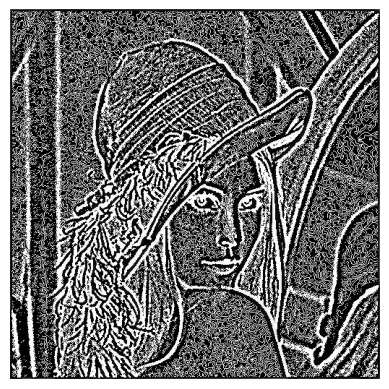

In [39]:
plt.imshow(log,cmap='gray')
plt.axis('off')

In [41]:
def DoG(image, sigma1=1.0, sigma2=2.0):
    blurred1 = cv2.GaussianBlur(image, (0, 0), sigma1)
    blurred2 = cv2.GaussianBlur(image, (0, 0), sigma2)
    
    dog_image = blurred1 - blurred2
    
    return dog_image

In [42]:
dog=DoG(image,2,1)

(-0.5, 511.5, 511.5, -0.5)

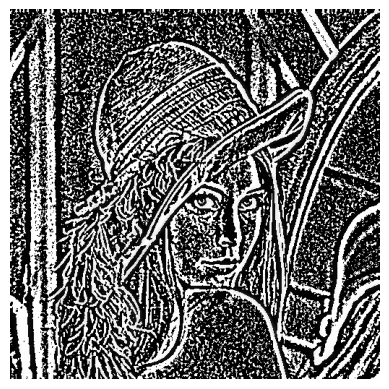

In [43]:
plt.imshow(dog,cmap='gray')
plt.axis('off')